In [ ]:
#########################
# Off policy evaluation #
#########################
from HA3.HA3_Off_Policy_Evaluation import off_policy_evaluation
import numpy as np

ope = off_policy_evaluation()
ope.load_data(0)
results_i = [ope.algo_CE_OPE(), ope.algo_IS(), ope.algo_IS(method='Weighted'), ope.algo_IS(method='PerDecision')]

V_true = ope.true_value()
results_ii = [np.abs(V_true - x) for x in results_i]


lst_CE_OPE = []
lst_IS = []
lst_WIS = []
lst_PDIS = []
for i in range(11):
    ope.load_data(i)
    lst_CE_OPE.append( ope.algo_CE_OPE())
    lst_IS.append( ope.algo_IS())
    lst_WIS.append( ope.algo_IS(method = 'Weighted'))
    lst_PDIS.append( ope.algo_IS(method = 'PerDecision'))

results_iii = [np.var(lst_CE_OPE), np.var(lst_IS), np.var(lst_WIS), np.var(lst_PDIS)]

res_1 = ", ".join(f"{x:.5f}" for x in results_i)
res_2 = ", ".join(f"{x:.5f}" for x in results_ii)
res_3 = ", ".join(f"{x:.5f}" for x in results_iii)
print(f'results_i = {res_1}')
print(f'results_ii = {res_2}')
print(f'results_iii = {res_3}')

2
3
4
5
2
3
4
5
2
3
4


KeyboardInterrupt: 

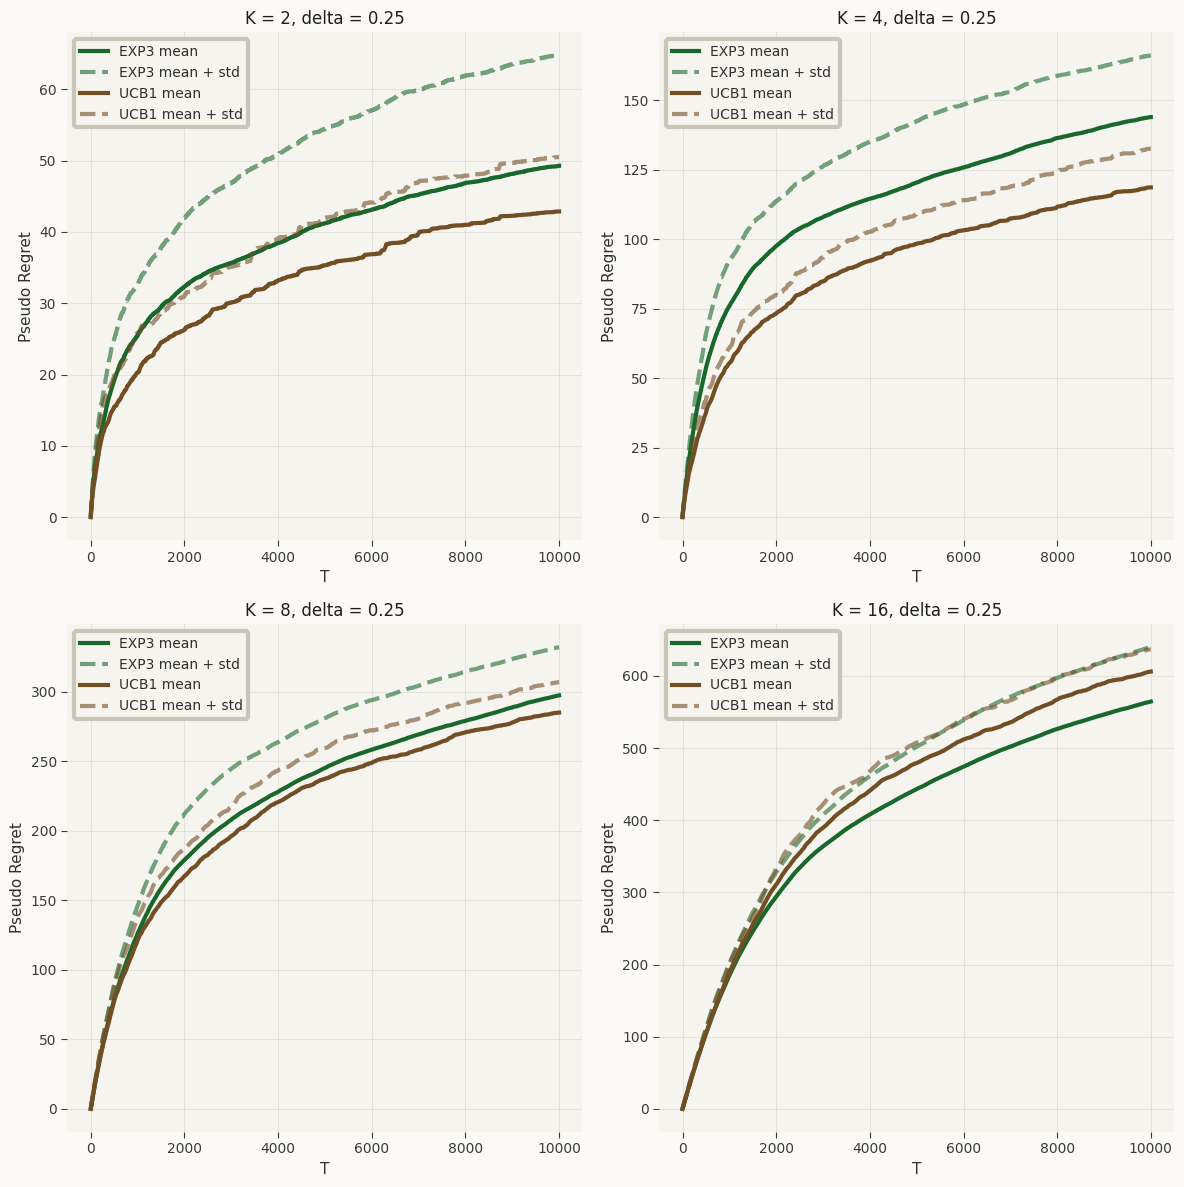

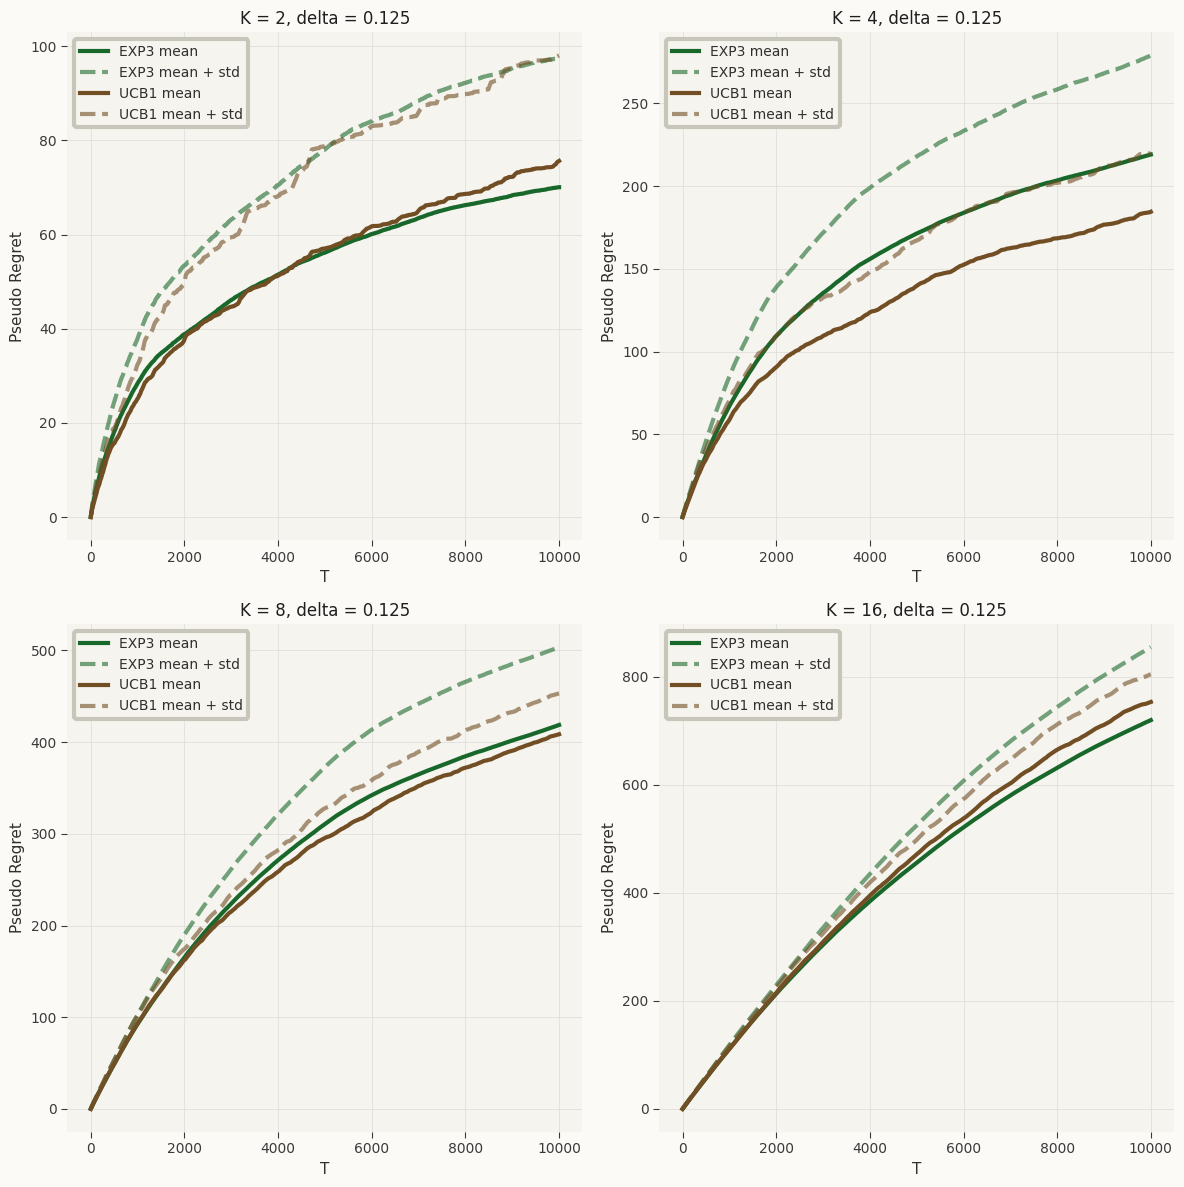

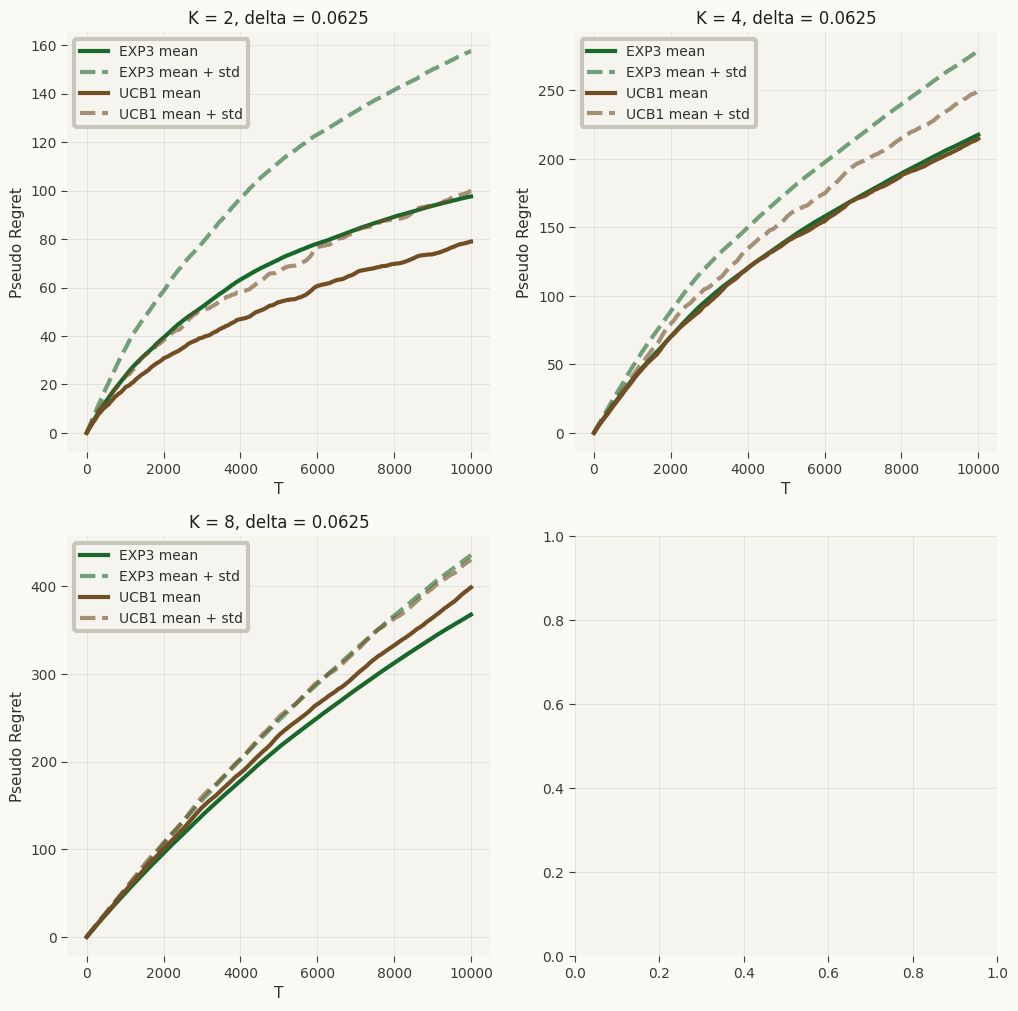

In [3]:
#################
# UCB1 and EXP3 #
#################

from HA3.HA3_UCB1_EXP3 import comparison
import numpy as np
import matplotlib.pyplot as plt

for delta0 in [1 / 4, 1 / 8, 1 / 16]:
    i = 1
    plt.figure(figsize=[12, 12])
    for K0 in [2,4,8,16]:

        plt.subplot(2, 2, i)
        comp = comparison()
        results = np.array([comp.run_ucb_exp3(delta=delta0, T=10000, K=K0) for i in range(20)])
        mean_vals = results.mean(axis=0)
        std_vals_plus = results.mean(axis=0) + results.std(axis=0)

        line, = plt.plot(mean_vals[1, :], label='EXP3 mean')
        plt.plot(std_vals_plus[1,:], label='EXP3 mean + std', color = line.get_color(), linestyle = 'dashed', alpha = 0.6)

        line, = plt.plot(mean_vals[0, :], label='UCB1 mean')
        plt.plot(std_vals_plus[0, :], label='UCB1 mean + std', color=line.get_color(), linestyle = 'dashed', alpha = 0.6)

        plt.legend()
        plt.title(f'K = {K0}, $\delta$ = {delta0}')
        plt.ylabel('Pseudo Regret')
        plt.xlabel('T')

        i += 1

    plt.tight_layout()
    plt.show()


